**Note :**


>  This Project and the report are built as a part of a hackathon, conducted by Spotle.ai. As a part of this project, we are provided with a set of tweets. And the task was to find a way to associate or classify a tweet with a particular emotion.

>  We have done two experiments, in one we used hashtags and emojis to label a tweet with its emotion. And in the next experiment, we tried to label the tweets based on a lexicon database of words with emotions. And after the project, we concluded that the first way of labelling was not successful. But in the second approach, we were able to successfully label the tweets with the emotion using contextual emotion vectors of words in lexicon database.

> **We have not used any external dataset of tweets in this project.**

&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;

**Table of contents**
\
\
\
**1.&nbsp;&nbsp;&nbsp;Introduction**\
\
&nbsp;&nbsp;1.1&nbsp;&nbsp;&nbsp;&nbsp;About\
&nbsp;&nbsp;1.2&nbsp;&nbsp;&nbsp;&nbsp;Objective\
&nbsp;&nbsp;1.3&nbsp;&nbsp;&nbsp;&nbsp;Dataset\
&nbsp;&nbsp;1.4&nbsp;&nbsp;&nbsp;&nbsp;Rules of submission\
&nbsp;&nbsp;1.5&nbsp;&nbsp;&nbsp;&nbsp;Approach\
\
**2.&nbsp;&nbsp;&nbsp;Importing packages and data**\
\
&nbsp;&nbsp;2.1&nbsp;&nbsp;&nbsp;&nbsp;Importing necessary packages\
&nbsp;&nbsp;2.2&nbsp;&nbsp;&nbsp;&nbsp;Downloading the data\
&nbsp;&nbsp;2.3&nbsp;&nbsp;&nbsp;&nbsp;Building a single csv file\
&nbsp;&nbsp;2.4&nbsp;&nbsp;&nbsp;&nbsp;Importing the data\
\
**3.&nbsp;&nbsp;&nbsp;Analyzing location and when tweets are posted**\
\
&nbsp;&nbsp;3.1&nbsp;&nbsp;&nbsp;&nbsp;Locations\
&nbsp;&nbsp;3.2&nbsp;&nbsp;&nbsp;&nbsp;When are these tweets posted (Day)\
&nbsp;&nbsp;3.3&nbsp;&nbsp;&nbsp;&nbsp;Converting UTC to IST and analyzing the time of the day\
\
**4.&nbsp;&nbsp;&nbsp;Feature extraction and data pre-processing**\
\
&nbsp;&nbsp;4.1&nbsp;&nbsp;&nbsp;&nbsp;Extracting the emojis\
&nbsp;&nbsp;4.2&nbsp;&nbsp;&nbsp;&nbsp;Emojis to words\
&nbsp;&nbsp;4.3&nbsp;&nbsp;&nbsp;&nbsp;Getting hashtags from tweets\
&nbsp;&nbsp;4.4&nbsp;&nbsp;&nbsp;&nbsp;Converting text into ascii\
&nbsp;&nbsp;4.5&nbsp;&nbsp;&nbsp;&nbsp;Converting tweets to lower\
&nbsp;&nbsp;4.6&nbsp;&nbsp;&nbsp;&nbsp;Removing the handles\
&nbsp;&nbsp;4.7&nbsp;&nbsp;&nbsp;&nbsp;Removing the hashtags from tweets\
&nbsp;&nbsp;4.8&nbsp;&nbsp;&nbsp;&nbsp;Removing the URL‘s and hyperlinks\
&nbsp;&nbsp;4.9&nbsp;&nbsp;&nbsp;&nbsp;Removing the punctuations and special characters\
&nbsp;&nbsp;4.10&nbsp;&nbsp;Getting hashtags from tweets\
&nbsp;&nbsp;4.11&nbsp;&nbsp;Saving the resulting dataframe\
\
**5.&nbsp;&nbsp;&nbsp;Analyzing the hashtags**\
\
&nbsp;&nbsp;5.1&nbsp;&nbsp;&nbsp;&nbsp;Getting the hashtags counts\
&nbsp;&nbsp;5.2&nbsp;&nbsp;&nbsp;&nbsp;Top 50 frequently used hashtags\
&nbsp;&nbsp;5.3&nbsp;&nbsp;&nbsp;&nbsp;Checking hashtags for emotions\
&nbsp;&nbsp;5.4&nbsp;&nbsp;&nbsp;&nbsp;Segregating hashtags into emotion groups\
&nbsp;&nbsp;5.5&nbsp;&nbsp;&nbsp;&nbsp;Generating a wordcloud from hashtags\
\
**6.&nbsp;&nbsp;&nbsp;Analyzing the emojis**\
\
&nbsp;&nbsp;6.1&nbsp;&nbsp;&nbsp;&nbsp;Getting the emoji counts\
&nbsp;&nbsp;6.2&nbsp;&nbsp;&nbsp;&nbsp;Segregating emojis into emotions\
&nbsp;&nbsp;6.3&nbsp;&nbsp;&nbsp;&nbsp;Generating wordcloud from emojis\
\
**7.&nbsp;&nbsp;&nbsp;Sentiment analysis of tweets**\
\
&nbsp;&nbsp;7.1&nbsp;&nbsp;&nbsp;&nbsp;Building the ploarity feature using textblob\
&nbsp;&nbsp;7.2&nbsp;&nbsp;&nbsp;&nbsp;Analyzing the polarity in the tweets\
&nbsp;&nbsp;7.3&nbsp;&nbsp;&nbsp;&nbsp;Polarity vs Time of the day tweet was posted\
\
**8.&nbsp;&nbsp;&nbsp;An attempt to label the tweets based on hashtags and emojis**\
\
&nbsp;&nbsp;8.1&nbsp;&nbsp;&nbsp;&nbsp;Generating emotion based on hashtags\
&nbsp;&nbsp;8.2&nbsp;&nbsp;&nbsp;&nbsp;Generating the emotion based on emojis\
&nbsp;&nbsp;8.3&nbsp;&nbsp;&nbsp;&nbsp;Saving the final csv\
\
**9.&nbsp;&nbsp;&nbsp;Analyzing the correlation between polarity and emotions**
\
\
**10.&nbsp;&nbsp;Using lexicons to label the emotion of a tweet**\
\
&nbsp;&nbsp;10.1&nbsp;&nbsp;Downloading the lexicons data\
&nbsp;&nbsp;10.2&nbsp;&nbsp;Importing the lexicons\
&nbsp;&nbsp;10.3&nbsp;&nbsp;Labeling emotion from tweet based on keywords\
&nbsp;&nbsp;10.4&nbsp;&nbsp;Analyzing the emotion scores\
&nbsp;&nbsp;10.5&nbsp;&nbsp;Merging scores and original dataframe\
&nbsp;&nbsp;10.6&nbsp;&nbsp;Saving the labeled dataset\
\
**11.&nbsp;&nbsp;Modeling**\
\
&nbsp;&nbsp;11.1&nbsp;&nbsp;Preparing the data for modeling\
&nbsp;&nbsp;11.2&nbsp;&nbsp;Binarizing the emotion columns\
&nbsp;&nbsp;11.3&nbsp;&nbsp;Checking for Imbalance\
&nbsp;&nbsp;11.4&nbsp;&nbsp;Splitting the data into train and test\
&nbsp;&nbsp;11.5&nbsp;&nbsp;Vectorizing the tweet (TF-IDF)\
&nbsp;&nbsp;11.6&nbsp;&nbsp;Encoding the time of the day\
&nbsp;&nbsp;11.7&nbsp;&nbsp;Encoding the polarity\
&nbsp;&nbsp;11.8&nbsp;&nbsp;Building the feature sets\
&nbsp;&nbsp;11.9&nbsp;&nbsp;Getting class imbalances ratios\
&nbsp;&nbsp;11.10 Logistic regression\
\
**12.&nbsp;&nbsp;Final steps**\
\
**References and acknowledgements**


# Introduction

## About

**Team : The Elite**

- Vidhya Subramaniam
- Devleena Banerjee
- Priyank jha
- Karthik chiranjeevi

## Objective

**Analyse the mental health of India during COVID using Twitter**

This Covid-19 pandemic has severely affected countries around the world. The intensity of the pandemic is increasing very fast in India. The number of new cases is increasing every day, every week. In a span of six months, the total number of cases crossed 50 lakh and total number of deaths is almost I lakh. It has been observed that the sudden outbreaks of such pandemics affect public mental states and emotions. This pandemic also result in either constructive or destructive behavioural changes among people. Anger, Sadness, fear are the most common emotions witnessed among the people during several pandemics. Social media platform like Twitter and others have rich sources of information from people. 

## Dataset

The zipped folder contains several files and each file contains dump of several tweets in json format. Each tweet has four attributes viz. text, location, date and time.

https://cdn.spotle.ai/aithon/aithon2020_level_3.zip

## Rules of submission

Submit a report in pdf format, showing your summary findings and conclusions. You can also submit any code files or models in zip formats.

In your final report,

1.First you have to write down different types of emotions you are considering for the study. You have to consider a least 3 different types of emotions namely ‘Sad’, ‘Fear’ and ‘Happy’.

2.You have define how you are associating or classifying a tweet to any of emotions you are considering.

## Approach

![Approach.png](assets/Approach.png)

# Importing packages and data

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
from nltk.corpus import stopwords
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
import emoji
from textblob import TextBlob
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
import dill
import joblib
import ast
import os
import warnings
warnings.filterwarnings('ignore')

## Downloading the data

**Downloading dataset zip file :**

In [2]:
!wget https://cdn.spotle.ai/aithon/aithon2020_level_3.zip

--2020-10-03 17:28:23--  https://cdn.spotle.ai/aithon/aithon2020_level_3.zip
Resolving cdn.spotle.ai (cdn.spotle.ai)... 139.59.69.253
Connecting to cdn.spotle.ai (cdn.spotle.ai)|139.59.69.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49978089 (48M) [application/zip]
Saving to: ‘aithon2020_level_3.zip’

aithon2020_level_3. 100%[===================>]  47.66M  2.46MB/s    in 18s     

2020-10-03 17:28:41 (2.64 MB/s) - ‘aithon2020_level_3.zip’ saved [49978089/49978089]



**Extracting the zip :**

In [3]:
!unzip aithon2020_level_3.zip -d aithon2020_level_3/

Archive:  aithon2020_level_3.zip
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T05:11:55.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T05:31:23.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T06:01:22.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T06:31:22.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T07:01:23.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T07:31:21.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T08:01:22.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T08:31:22.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T09:01:23.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T09:31:23.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T10:01:23.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T10:31:25.txt  
  inflating: aithon2020_level_3/aithon_level_3_2020-09-22T11:01:25.txt  
  inflating: aitho

## Building a single csv file

**Getting the path :**

In [4]:
path = os.getcwd()+'/'

**Getting the files in the directory :**

In [5]:
files = os.listdir(path+'aithon2020_level_3/')

**Combining all the text files into a single csv :**

In [6]:
temp = []
for i in tqdm(range(len(files))):
    data = pd.read_json(path+'aithon2020_level_3/'+files[i])
    temp.append(data)

100%|██████████| 28/28 [00:02<00:00, 11.64it/s]


**Merging all dataframes :**

In [7]:
result = pd.concat(temp,ignore_index=True)

**Dimensions of the data :**

In [8]:
result.shape

(496448, 4)

**Checking and removing the duplicates :**

In [9]:
len(result.drop_duplicates())

14204

In [10]:
result = result.drop_duplicates()

**Writing the csv file into data folder :**

In [11]:
path = os.getcwd()
try:  
    # Creating a new directory 'data'
    os.mkdir(path+'/data')  
except OSError as error:  
    # If directory already exists
    print(error)
    print("\nDelete the existing data folder & try again")

In [12]:
if not os.path.isfile('data/tweets.csv'):
    result.to_csv('data/tweets.csv',index=False)
else:
    print("tweets.csv already exists")

## Importing the data

In [13]:
tweets = pd.read_csv('data/tweets.csv')

In [14]:
tweets.head()

,text,location,date,time
0,#CoronaVirusUpdates LIVE | Recoveries exceed n...,IN,Sep 22,11:30:00
1,@plenkless @talkRADIO @JuliaHB1 You really thi...,India,Sep 22,11:29:59
2,@MsRain62 @kseniaqt @RunningDeep67 @JamesTodar...,Woking Surrey England,Sep 22,11:29:50
3,Corona Schism: UK Scientists Split Over How Go...,somewhere on a big blue ball,Sep 22,11:29:00
4,UPDATE: Corona schism: UK scientists split ove...,Nemesis Nibiru 🙏🐈✨,Sep 22,11:28:10


In [15]:
tweets.shape

(14204, 4)

**A sample tweet :**

In [16]:
tweets['text'].values[1647]

'not only in #UnitedKingdom #Covid_19 #coronavirus #Corona #infection everywhere round da #world things are getting worse even in #Germany so we all gonna die from #Covid like #punk died long ago from whatever.i hope u dont believe dat #pandemic 😂🤣😍'

# Analyzing location and when tweets are posted

## Locations

**Tweets from top 20 locations :**

> **"In the provided dataset, many location names are not accurate. eg: The 5th tweet in the dataset is 'Nemesis     Nibiru' which is not a location. Limiting ourselves to the most repeating location values that are actually    places is preferred. From the below list you can clearly see that majority of the tweets are made from the INDIA."**

In [17]:
tweets['location'].value_counts()[:20]

India                      1002
Switzerland                 359
United Kingdom              172
Chennai, India              125
Punjab, India               124
United States               120
New Delhi, India            117
UK                          100
Mumbai, India                91
London, England              79
Bengaluru, India             62
London                       60
Auckland, New Zealand        59
Tondiarpet, VadaChennai      57
New Delhi                    55
England, United Kingdom      48
Hyderabad, India             45
USA                          45
Mumbai                       40
Pakistan                     39
Name: location, dtype: int64

## When are these tweets posted (Day)

In [18]:
date = tweets['date'].value_counts()

<AxesSubplot:xlabel='Date', ylabel='Number of tweets on the date'>

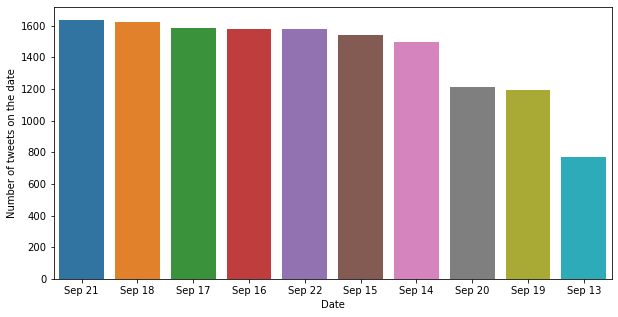

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Number of tweets on the date")
sns.barplot(x=date.index,y=date.values)

## Converting UTC to IST and analyzing the time of the day

**Converting time data type and categorizing them based on Indian time (IST i.e UTC+05:30) :**

> **"Generally when the tweets are downloaded using API, the time is given in UTC format. For the convenience of analysis the time format is converted from UTC to IST."**

In [20]:
temp = pd.to_datetime(tweets['time']) + pd.DateOffset(hours=5,minutes=30)

**Getting the time of the day :**

> **"The below segregation was our specific choice. We can divide the day into intervals based on many aspects."**

In [21]:
tweets['time_of_the_day'] = ''
for i in tqdm(range(len(tweets))):
    if temp[i].hour >= 6 and temp[i].hour < 12:
        tweets.iloc[i,4] = "Morning"
    if temp[i].hour >= 12 and temp[i].hour < 18:
        tweets.iloc[i,4] = "Afternoon"
    if temp[i].hour >= 18 and temp[i].hour < 24:
        tweets.iloc[i,4] = "Night"
    if temp[i].hour >= 0 and temp[i].hour < 3:
        tweets.iloc[i,4] = "Midnight"
    if temp[i].hour >= 3 and temp[i].hour < 6:
        tweets.iloc[i,4] = "Early Morning"

100%|██████████| 14204/14204 [00:03<00:00, 3844.64it/s]


<AxesSubplot:xlabel='time_of_the_day', ylabel='count'>

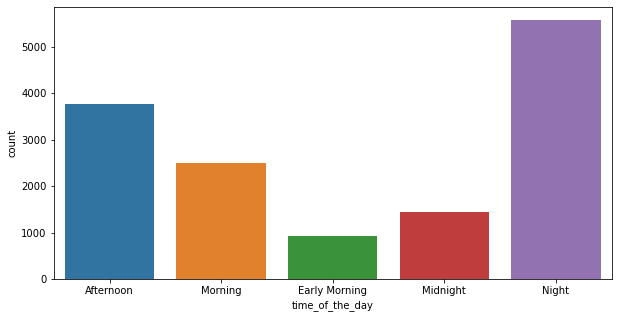

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel("Time of the day")
plt.ylabel("Number of tweets on the time of day")
sns.countplot(data=tweets,x="time_of_the_day")

> **"It seems like most of the tweets are posted in the night. And very early morning less number are actually active on twitter."**

# Feature extraction and data pre-processing

## Extracting the emojis

> **"It can be intuitively understood that, emojis sometimes may represent the entire emotion of a tweet. But it is not mandatory. So the emojis are extracted as a separate feature."**

In [23]:
def extract_emoji(a_list):
    """
    The code was taken from here : 
    https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
    
    input : A list of words in a tweet
    output: A list of emojis present in the input
    
    """
    emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
    r = re.compile('|'.join(re.escape(p) for p in emojis_list))
    aux=[' '.join(r.findall(s)) for s in a_list]
    '''
    for i in aux:
        if i!='':
            temp += i
    '''
    aux = [x for x in aux if x.strip()]
    if len(aux)==0:
        return "*"
    else:
        return(aux[0].split())

In [24]:
def generate_emoji_features():
    """
    This function adds a new column with emojis extracted from the tweets.
    
    input : --
    output: In the tweets.csv file a new column is added with emojis extracted
    
    """
    tweets['emojis'] = ''
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,5] = extract_emoji(tweets.iloc[i,0].split())

In [25]:
if not os.path.isfile('data/clean_tweets.csv'):
    generate_emoji_features()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [01:07<00:00, 211.57it/s]


## Emojis to words

> **"Using the emoji library, the emoji characters were further converted to their appropriate meaning. This will be helpful in the analysis."**

In [26]:
def emojis_to_words():
    """
    This function converts emojis into their appropriate meaning.
    
    input : --
    output: In the tweets.csv file a new column is added with emojis extracted meanings
    
    """
    tweets['emojis_in_words'] = ''
    for i in tqdm(range(len(tweets))):
        if tweets.iloc[i,5]!='*':
            tweets.iloc[i,6] = emoji.demojize(' '.join(tweets.iloc[i,5])).replace(":","").split()
        else:
            tweets.iloc[i,6] = '*'          

In [27]:
if not os.path.isfile('data/clean_tweets.csv'):
    emojis_to_words()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4288.00it/s]


## Getting hashtags from tweets

> **"It is very much possible that people can directly tag their emotion using hashtag. So extracting hashtags would let us understand trends. And also the emotion of some of the tweets."**

In [28]:
def starts_with_hashtag(words_list):
    """
    This function extracts words starting with a hashtag(#)
    
    input : Takes a list of words
    output: Returns a list of words starting with #
    
    """
    temp = []
    for i in words_list:
        if i.startswith('#'):
            temp.append(i[1:])
    if len(temp) ==0:
        return "*"
    else:
        return temp

In [29]:
def generate_hashtag_features_from_tweets():
    """
    This function adds a new column with hashtags from the tweets
    
    input : --
    output: In the tweets.csv file a new column is added with hashtags
    """
    tweets['hashtags'] = ''
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,7] = starts_with_hashtag(tweets.iloc[i,0].split())

In [30]:
if not os.path.isfile('data/clean_tweets.csv'):
    generate_hashtag_features_from_tweets()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4318.76it/s]


## Converting text into ascii

> **"As we have already extracted the emojis and hashtags, we can safely now convert the tweets into ascii. So any UTF-8 encoded characters will be automatically removed."**

In [31]:
def convert_to_ascii():
    """
    Converts the tweets to ascii.
    
    input : --
    output: In the tweets.csv changes the text from UTF-8 to ascii
    
    """
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = tweets.iloc[i,0].encode('ascii', 'ignore').decode("utf-8")

In [32]:
if not os.path.isfile('data/clean_tweets.csv'):
    convert_to_ascii()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4531.28it/s]


## Converting tweets to lower

> **"While modeling and analyzing words in tweets, we need to have all the text in lowercase."**

In [33]:
def lowercase_the_tweets():
    """
    This function converts the tweets into lowercase.
    
    input : --
    output: In the tweets.csv changes the text to lowercase
    
    """
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = tweets.iloc[i,0].lower()

In [34]:
if not os.path.isfile('data/clean_tweets.csv'):
    lowercase_the_tweets()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4320.99it/s]


## Removing the handles

> **"Our objective is to understand the emotion of the tweets. Handles contribute least in that direction. Even then if we want to analyze how the handles in tweet correlate to emotion, we need to have a database of handles and most recently conveyed emotion on tagging that handle. Which is a tedious task. So in this, we are removing the handles."**

In [35]:
def remove_handles():
    """
    Removes the twitter handles from the tweets.
    
    input : --
    output: In the tweets.csv the handles are removed from text
    
    """
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = re.sub('@[^\s]+','',tweets.iloc[i,0])

In [36]:
if not os.path.isfile('data/clean_tweets.csv'):
    remove_handles()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4459.97it/s]


## Removing the hashtags from tweets 

> **"As we have already extracted the hashtags, we can safely remove them from the text."**

In [37]:
def remove_hashtags():
    """
    Removes the hashtags from the tweets.
    
    input : --
    output: In the tweets.csv the hashtags are removed from text
    
    """
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = re.sub('#[^\s]+','',tweets.iloc[i,0])

In [38]:
if not os.path.isfile('data/clean_tweets.csv'):
    remove_hashtags()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4477.48it/s]


## Removing the URL`s and hyperlinks

> **"Similar to handles, urls and hyperlinks contribute least towards correlating a tweet with emotion. It is not possible to associate an emotion to an url in an normal context."**

In [39]:
def remove_hyperlinks():
    """
    Removes the hyperlinks.
    
    input : --
    output: In the tweets.csv text the urls and hyperlinks are removed
    
    """
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = re.sub(r"http\S+", "", tweets.iloc[i,0])

In [40]:
if not os.path.isfile('data/clean_tweets.csv'):
    remove_hyperlinks()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4401.12it/s]


## Removing the punctuations and special characters

> **"The punctuations and also special characters are removed, as they are not needed in analysis or prediction."**

In [41]:
def remove_punctuations_and_special_characters():
    """
    Removes the pnctuations and special charecters.
    
    input : --
    output: In the tweets.csv the punctuations and special charecters are removed
            from text
    """
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = re.sub('[!#?,.:";|\n]', '', tweets.iloc[i,0])

In [42]:
if not os.path.isfile('data/clean_tweets.csv'):
    remove_punctuations_and_special_characters()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:03<00:00, 4292.47it/s]


## Removing stop words

> **"The stop words are removed so as to ensure that the most repeating words that do not generally convey an emotion are removed."**

In [43]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chiranjeevi_karthik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def remove_stopwords(tweet):
    """
    Takes input a tweet and returns the tweet without stop words.
    
    input : A string (Tweet)
    output: Returns a string without stopwords
    """
    char = ""
    for i in tweet.split():
        if i not in stop_words:
            char = char+" "+i
    char = char.lstrip(' ')
    char = char.rstrip(' ')
    return char

In [45]:
def remove_stopwords_from_tweets():
    """
    Removes the stopwords from the tweets.
    
    input : --
    output: Removes the stopwords from the tweets.csv
    """
    for i in tqdm(range(len(tweets))):
        tweets.iloc[i,0] = remove_stopwords(tweets.iloc[i,0])

In [46]:
if not os.path.isfile('data/clean_tweets.csv'):
    remove_stopwords_from_tweets()
else:
    print("clean_tweets.csv already exists")

100%|██████████| 14204/14204 [00:04<00:00, 2898.37it/s]


## Saving the resulting dataframe

In [47]:
if not os.path.isfile('data/clean_tweets.csv'):
    tweets.to_csv('data/clean_tweets.csv',index=False)
else:
    print("clean_tweets.csv already exists")

**Importing clean_tweets.csv file :**

In [48]:
clean_tweets = pd.read_csv('data/clean_tweets.csv')

In [49]:
clean_tweets.head()

,text,location,date,time,time_of_the_day,emojis,emojis_in_words,hashtags
0,live recoveries exceed new cases 4 days says c...,IN,Sep 22,11:30:00,Afternoon,*,*,"['CoronaVirusUpdates', 'coronaviruspandemic']"
1,really think idea still say 92% population sus...,India,Sep 22,11:29:59,Afternoon,*,*,*
2,flu avg corona /rhino repro rate 2 less covid ...,Woking Surrey England,Sep 22,11:29:50,Afternoon,*,*,*
3,corona schism uk scientists split government d...,somewhere on a big blue ball,Sep 22,11:29:00,Afternoon,*,*,*
4,update corona schism uk scientists split gover...,Nemesis Nibiru 🙏🐈✨,Sep 22,11:28:10,Afternoon,*,*,['SputnikUpdates']


# Analyzing the hashtags

## Getting the hashtags

In [50]:
hashtags= {}
for i in tqdm(range(len(tweets))):
    temp = tweets.iloc[i,7]
    for j in temp:
        if j not in hashtags:
            hashtags[j] = 1
        else:
            hashtags[j] +=1      

100%|██████████| 14204/14204 [00:00<00:00, 46578.27it/s]


**Building a dataframe from dictionary :**

In [51]:
hashtags_df = pd.DataFrame(hashtags.items(),columns=['tag','frequency'])

**Sorting the tags based on their frequency :**

In [52]:
hashtags_df = hashtags_df.sort_values(by=['frequency'],ascending=False)

**Displaying dataframe :**

In [53]:
hashtags_df.head()

,tag,frequency
2,*,7065
7,Corona,2422
9,coronavirus,2380
15,COVID19,2039
16,Covid_19,1684


## Top 50 frequently used hashtags

**' * ' represents the tweets with no hashtags**

<AxesSubplot:xlabel='Number of times used', ylabel='Hashtag'>

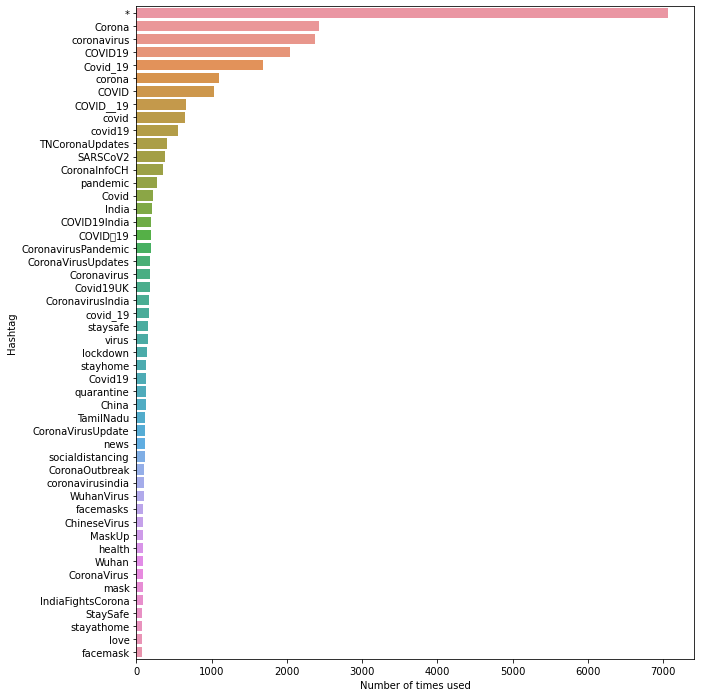

In [54]:
plt.figure(figsize=(10,12))
plt.xlabel("Number of times used")
plt.ylabel("Hashtag")
sns.barplot(y=hashtags_df['tag'].values[:50],x =hashtags_df['frequency'].values[:50])

> **"In simple words, the number of tweets related to COVID-19 are high in number. And the same thing can be deuced from above."**

## Checking hashtags for emotions

**The below are the hashtags from the tweets that can be used to identify emotion :**

In [55]:
emotions = ['love','lol','birthday','spooky','beautiful',
            'jokes','motivation','laugh','like','happy','sad',
            'peace','wtf','amazing','toughtimes','loveyou',
            'depression','smile','fraud','anxiety','lie','racism',
            'violence','stayhappy','positivity','goodbye','help',
            'compassion','RestInPeace','fate','Wonderfull','Party',
            'staypostive','bored','victory','winning','empathy',
             'death','win','failure','adventure','inspiring',
            'stress','pissed','nice','sad','LOL','died','sucide']

In [56]:
temp = hashtags_df['tag'].values
j=0
for i in emotions:
    if i in temp:
        print("{0}= {1}".format(i,hashtags_df['frequency'].values[j]),
              end=" : ")
    j+=1

love= 7065 : lol= 2422 : birthday= 2380 : spooky= 2039 : beautiful= 1684 : jokes= 1091 : motivation= 1029 : laugh= 665 : like= 651 : happy= 547 : sad= 406 : peace= 375 : wtf= 359 : amazing= 267 : toughtimes= 223 : loveyou= 205 : depression= 199 : smile= 191 : fraud= 191 : anxiety= 186 : lie= 181 : racism= 180 : violence= 168 : stayhappy= 167 : positivity= 153 : goodbye= 150 : help= 141 : compassion= 132 : RestInPeace= 125 : fate= 124 : Wonderfull= 122 : Party= 117 : staypostive= 113 : bored= 112 : victory= 111 : winning= 102 : empathy= 98 : death= 95 : win= 93 : failure= 91 : adventure= 88 : inspiring= 87 : stress= 87 : pissed= 86 : nice= 85 : sad= 82 : LOL= 80 : died= 78 : 

## Segregating hashtags into emotion groups

**We are using Ekman`s list of emotions and the segregation is purely biased by our own understanding :**

In [57]:
anger = ['fate','violence','racism','lie','fraud']
disgust = ['pissed','stress','bored','toughtimes']
fear = ['failure','anxiety','spooky']
joy = ['LOL','nice','inspiring','win','empathy','winning',
       'victory','staypositive','Party','Wonderfull',
       'compassion','help','smile','loveyou','peace',
       'happy','like','laugh','motivation','jokes',
       'beautiful','love','lol','birthday']
sadness = ['died','sad','death','RestInPeace','goodbye',
           'positivity','stayhappy','depression','sad']
surprise = ['adventure','amazing','wtf']

## Generating a wordcloud from hashtags

In [58]:
del hashtags['*']

In [59]:
wc = WordCloud(background_color="black",width=1000,height=1000, max_words=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(hashtags)

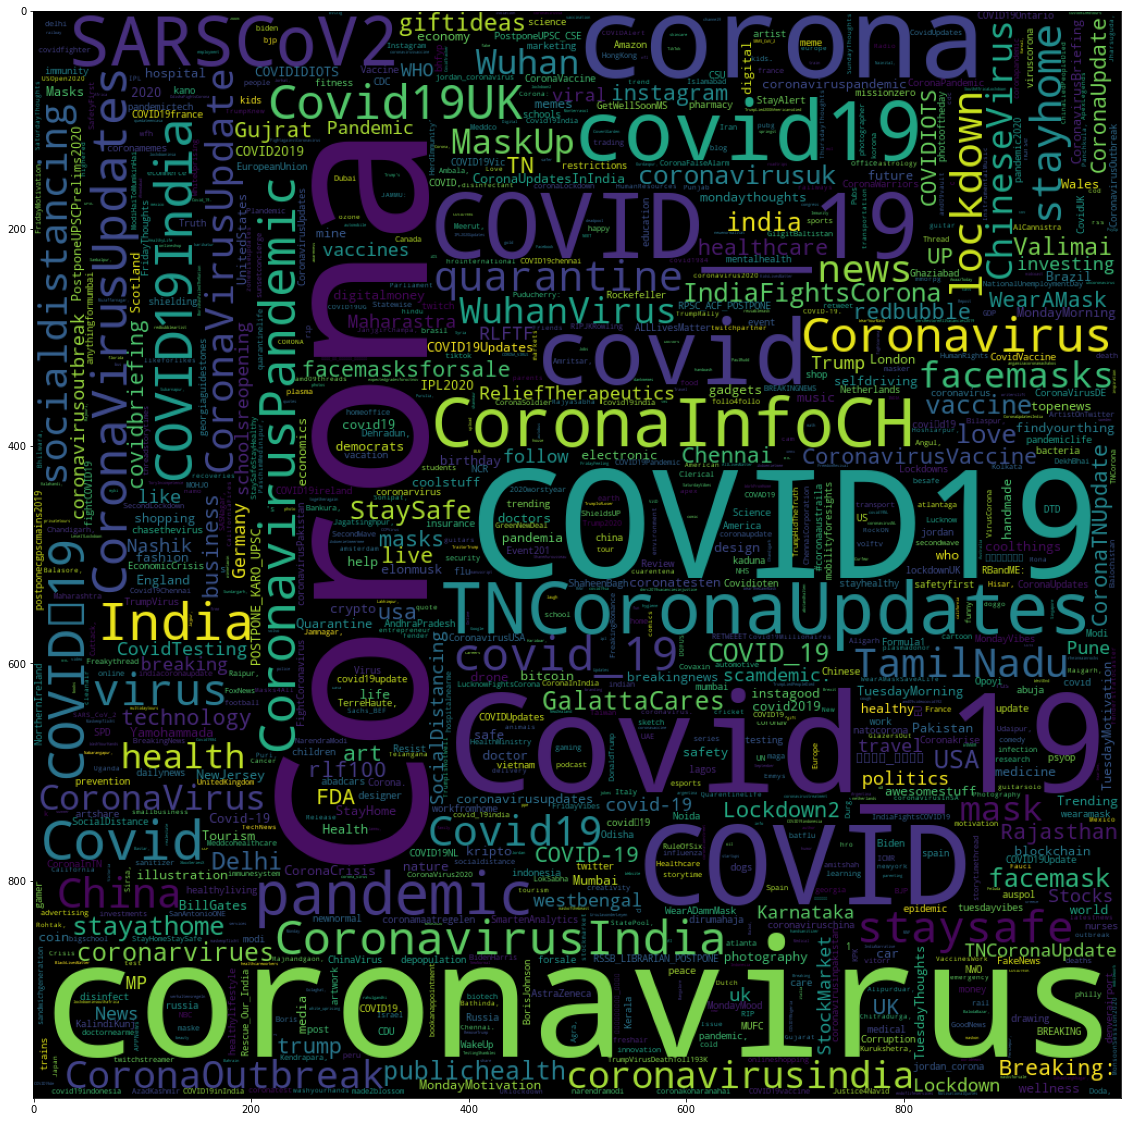

In [60]:
plt.figure(figsize=(20,20))
plt.imshow(wc)

# Analyzing the emojis

## Getting the emoji counts

In [61]:
emojis= {}
for i in tqdm(range(len(clean_tweets))):
    temp = clean_tweets.iloc[i,5]
    for j in temp:
        if j not in emojis:
            emojis[j] = 1
        else:
            emojis[j] +=1

100%|██████████| 14204/14204 [00:00<00:00, 88905.05it/s]


**Building a dataframe :**

In [62]:
emojis_df = pd.DataFrame(emojis.items(),columns=['emoji','frequency'])

**Sorting the dataframe :**

In [63]:
emojis_df = emojis_df.sort_values(by=['frequency'],ascending=False)

**Displaying the dataframe :**

In [64]:
emojis_df.tail()

,emoji,frequency
248,🌝,1
249,🐜,1
251,🔬,1
252,🌿,1
372,👨,1


**Emojis in words :**

In [65]:
for i in range(len(emojis_df['emoji'].values)):
    print("{0} = {1}".format(emojis_df['emoji'].values[i],emoji.demojize(' '.join(emojis_df['emoji'].values[i])).replace(":","").split()),end=" : ")

* = ['*'] : ' = ["'"] : 0 = ['0'] : ] = [']'] : [ = ['['] : , = [','] :   = [] : \ = ['\\'] : e = ['e'] : U = ['U'] : 😂 = ['face_with_tears_of_joy'] : 7 = ['7'] : 6 = ['6'] : 🤣 = ['rolling_on_the_floor_laughing'] : 🙏 = ['folded_hands'] : 2 = ['2'] : 😷 = ['face_with_medical_mask'] : 😭 = ['loudly_crying_face'] : 🤔 = ['thinking_face'] : 🏻 = ['light_skin_tone'] : 👇 = ['backhand_index_pointing_down'] : f = ['f'] : 3 = ['3'] : 🏴 = ['black_flag'] : 🙄 = ['face_with_rolling_eyes'] : 🤦 = ['person_facepalming'] : ♂ = ['male_sign'] : u = ['u'] : d = ['d'] : 🇺 = ['regional_indicator_symbol_letter_u'] : 🇸 = ['regional_indicator_symbol_letter_s'] : ♀ = ['female_sign'] : 👍 = ['thumbs_up'] : ❤ = ['red_heart'] : 🦠 = ['microbe'] : 🏾 = ['medium_dark_skin_tone'] : 🏽 = ['medium_skin_tone'] : 😀 = ['grinning_face'] : 👉 = ['backhand_index_pointing_right'] : 👏 = ['clapping_hands'] : 🤷 = ['person_shrugging'] : 😡 = ['pouting_face'] : 🇧 = ['regional_indicator_symbol_letter_b'] : 🙂 = ['slightly_smiling_face'] : 🇬 =

## Segregating emojis into emotions

In [66]:
anger_emojis = ['oncoming_fist','cat_face_with_wry_smile',
                'angry_face_with_horns','middle_finger',
                'angry_face','face_with_symbols_on_mouth',
                'pouting_face']
disgust_emojis = ['person_frowning','hot_face','lying_face',
                  'slightly_frowning_face','yawning_face',
                  'confounded_face','face_with_steam_from_nose',
                  'tired_face','face_vomiting',
                  'woozy_face','face_without_mouth',
                  'upside-down_face','nauseated_face',
                  'expressionless_face',
                  'grimacing_face','neutral_face','unamused_face',
                  'person_facepalming']
fear_emojis = ['hushed_face','worried_face','face_screaming_in_fear']
joy_emojis = ['grinning_cat_face_with_smiling_eyes',
              'face_with_tongue','black_heart','man_dancing',
              'yellow_heart','birthday_cake','kissing_cat_face',
              'cowboy_hat_face','purple_heart','sign_of_the_horns',
              'OK_hand','kissing_face_with_smiling_eyes',
              'sun_with_face','woman_dancing','face_savoring_food',
              'face_with_hand_over_mouth','cat_face_with_tears_of_joy',
              'green_heart','revolving_hearts','zany_face',
              'relieved_face',
              'grinning_cat_face','face_blowing_a_kiss',
              'partying_face','squinting_face_with_tongue',
              'person_gesturing_OK',
              'smiling_face_with_sunglasses',
              'smiling_face_with_halo','grinning_squinting_face',
              'star-struck','smiling_face_with_3_hearts','two_hearts',
              'winking_face_with_tongue',
              'grinning_face_with_smiling_eyes','hugging_face',
              'winking_face','smiling_face_with_smiling_eyes',
              'grinning_face_with_big_eyes',
              'beaming_face_with_smiling_eyes',
              'slightly_smiling_face',
              'grinning_face','rolling_on_the_floor_laughing',
              'face_with_tears_of_joy']
sadness_emojis = ['crying_cat_face','confused_face',
                  'downcast_face_with_sweat','persevering_face',
                  'fearful_face','disappointed_face',
                  'anxious_face_with_sweat','broken_heart',
                  'weary_face','pensive_face','sad_but_relieved_face',
                  'crying_face','loudly_crying_face']
surprise_emojis = ['astonished_face','face_with_monocle',
                   'face_with_open_mouth','exploding_head',
                    'flushed_face']

## Generating wordcloud from emojis

In [67]:
del emojis['*']
del emojis['[']
del emojis["'"]
del emojis["]"]
del emojis[',']
del emojis[' ']
del emojis['u']
del emojis['2']
del emojis['0']
del emojis['d']
del emojis['e']
del emojis['\\']
del emojis['U']

In [68]:
emojis_wc = {}
for key, value in emojis.items():
    emojis_wc[emoji.demojize(key).replace(":","")] = value

In [69]:
wc = WordCloud(background_color="black",width=1000,height=1000, max_words=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(emojis_wc)

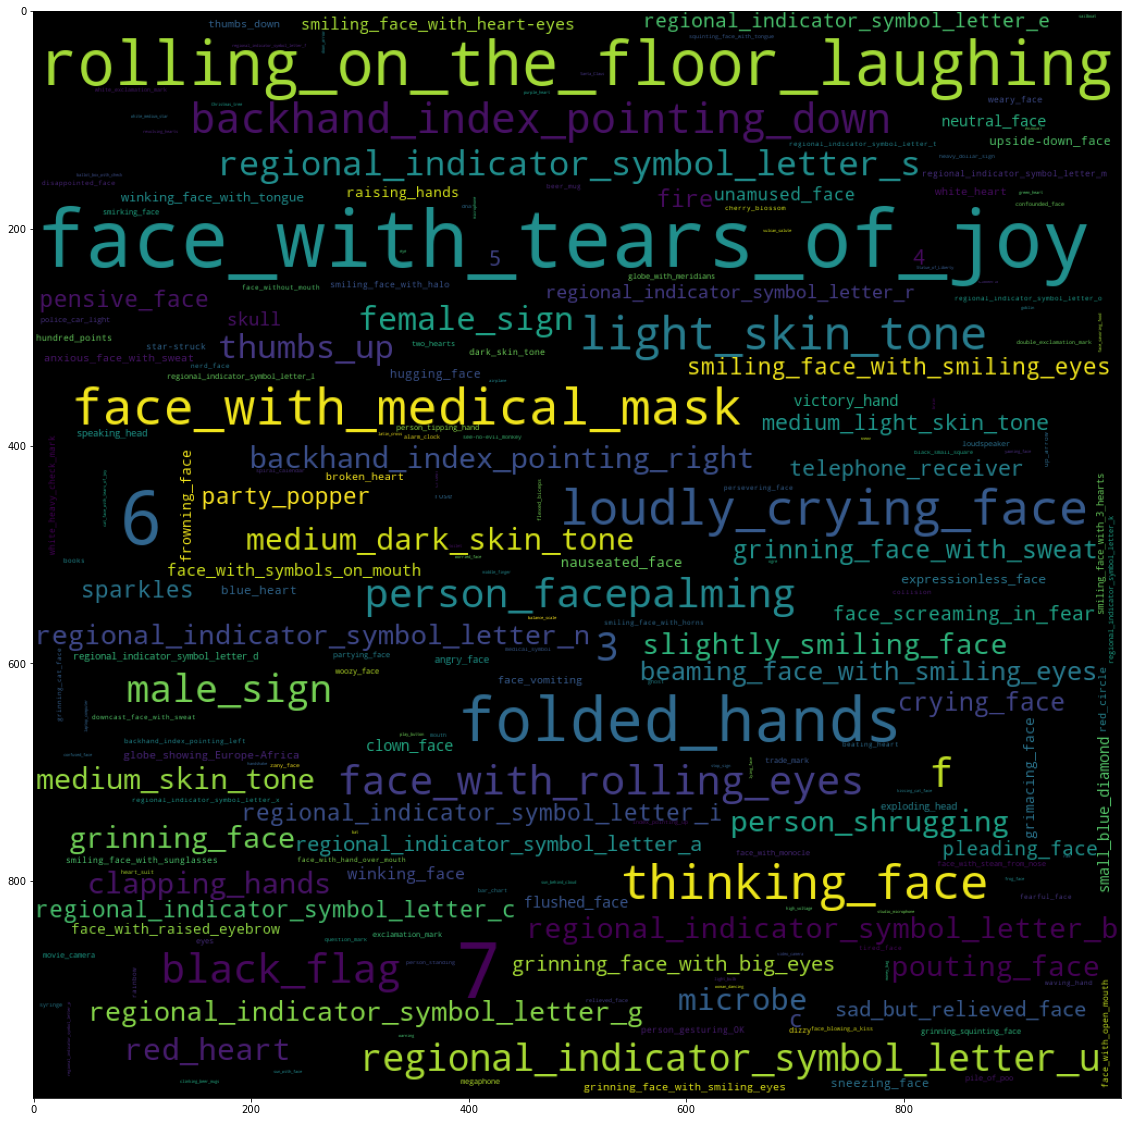

In [70]:
plt.figure(figsize=(20,20))
plt.imshow(wc)

# Sentiment analysis of tweets

In [71]:
clean_tweets = clean_tweets.dropna(subset=['text'])

## Building the ploarity feature using textblob

In [72]:
def return_polarity(tweet):
    """
    Returns the polarity of the tweet.
    
    input : --
    output: Returns polarity of tweet(Positive|Negative|Neutral)
    
    """
    tw = TextBlob(tweet)
    pol = tw.sentiment.polarity
    if pol==0:
        return "Neutral"
    elif pol>0:
        return "Positive"
    else:
        return "Negative"

In [73]:
def generate_polarity_feature():
    """
    Generates polarity feature.
    
    input : --
    outpt : In the clean_tweets.csv polarity feature is created for every tweet
    
    """
    clean_tweets['polarity'] = ''
    for i in tqdm(range(len(clean_tweets))):
        clean_tweets.iloc[i,8] = return_polarity(clean_tweets.iloc[i,0])

In [74]:
if not os.path.isfile('data/final.csv'):
    generate_polarity_feature()
else:
    print("final.csv already exists")

100%|██████████| 14189/14189 [00:07<00:00, 1776.30it/s]


## Analyzing the polarity in the tweets

<AxesSubplot:xlabel='Polarity', ylabel='count'>

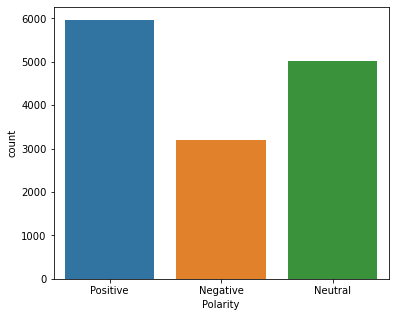

In [75]:
plt.figure(figsize=(6,5))
plt.xlabel("Polarity")
plt.ylabel("Number of tweets with polarity")
sns.countplot(x=clean_tweets['polarity'].values)

## Polarity vs Time of the day tweet was posted

<AxesSubplot:xlabel='Time of the day', ylabel='count'>

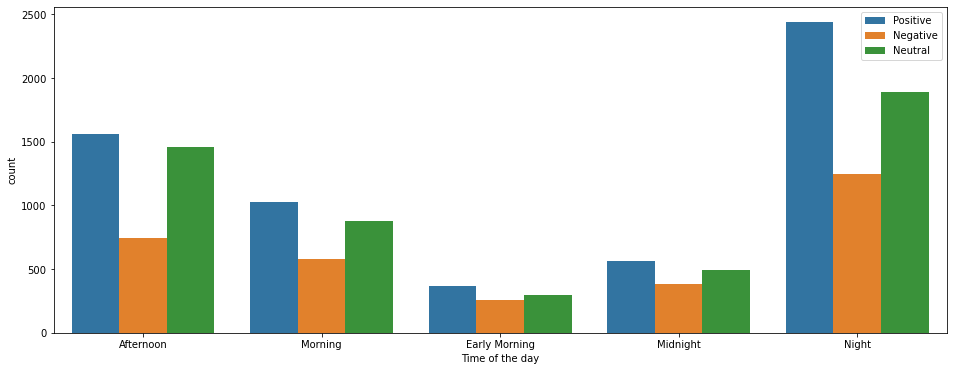

In [76]:
plt.figure(figsize=(16,6))
plt.xlabel("Time of the day")
plt.ylabel("Number of tweets with polarity")
sns.countplot(hue=clean_tweets['polarity'].values,x=clean_tweets['time_of_the_day'].values)

# An attempt to label the tweets based on hashtags and emojis

&nbsp;\
&nbsp;\
&nbsp;
> **"In this experiment we have tried to label the dataset, using the emotion extracted from emojis and hashtags. But for this task instead of using a lexicon database or a reference dataset, we have manually segregated the hashtags and emojis into various emotion categories."**

## Generating emotion based on hashtags

In [77]:
def generate_labeled_set_from_hashtags():
    """
    Generates the labels from hashtags.
    
    input : --
    output: Creates a emotion_from_hashtag feature in clean_tweets.csv
    
    """
    clean_tweets['emotion_from_hashtags'] = ''
    for i in tqdm(range(len(clean_tweets))):
        temp = clean_tweets.iloc[i,7]
        if temp != '*':
            temp = ast.literal_eval(temp)
        else:
            continue
        for j in temp:
            if j in anger:
                clean_tweets.iloc[i,9] = "Anger"
                break
            if j in disgust:
                clean_tweets.iloc[i,9] = "Disgust"
                break
            if j in fear:
                clean_tweets.iloc[i,9] = "Fear"
                break
            if j in joy:
                clean_tweets.iloc[i,9] = "Joy"
                break
            if j in sadness:
                clean_tweets.iloc[i,9] = "Sadness"
                break
            if j in surprise:
                clean_tweets.iloc[i,9] = "Surprise"
                break   

In [78]:
if not os.path.isfile('data/final.csv'):
    generate_labeled_set_from_hashtags()
else:
    print("final.csv already exists")

100%|██████████| 14189/14189 [00:00<00:00, 30480.95it/s]


**Number of tweets that can be labeled :**

In [79]:
clean_tweets['emotion_from_hashtags'].value_counts()

            13989
Joy           155
Sadness        22
Anger          10
Disgust         5
Surprise        4
Fear            4
Name: emotion_from_hashtags, dtype: int64

&nbsp;\
&nbsp;\
&nbsp;
> **"But using hashtags only a few tweets can be labeled. So this approach did not work with the given dataset"**

## Generating the emotion based on emojis

In [80]:
def generate_labeled_set_from_emojis():
    """
    generates the labels based on emojis.
    
    input : --
    output: A feature emotions_from_emojis is created in clean_tweets.csv
    """
    clean_tweets['emotion_from_emojis'] = ''
    for i in tqdm(range(len(clean_tweets))):
        temp = clean_tweets.iloc[i,6]
        if temp != '*':
            temp = ast.literal_eval(temp)
        else:
            continue
        for j in temp:
            if j in anger_emojis:
                clean_tweets.iloc[i,10] = "Anger"
                break
            if j in disgust_emojis:
                clean_tweets.iloc[i,10] = "Disgust"
                break
            if j in fear_emojis:
                clean_tweets.iloc[i,10] = "Fear"
                break
            if j in joy_emojis:
                clean_tweets.iloc[i,10] = "Joy"
                break
            if j in sadness_emojis:
                clean_tweets.iloc[i,10] = "Sadness"
                break
            if j in surprise_emojis:
                clean_tweets.iloc[i,10] = "Surprise"
                break    

In [81]:
if not os.path.isfile('data/final.csv'):
    generate_labeled_set_from_emojis()
else:
    print("final.csv already exists")

100%|██████████| 14189/14189 [00:00<00:00, 40671.81it/s]


**Number of tweets that can be labeled :**

In [82]:
clean_tweets['emotion_from_emojis'].value_counts()

            13617
Joy           312
Sadness       104
Disgust        83
Anger          31
Surprise       26
Fear           16
Name: emotion_from_emojis, dtype: int64

&nbsp;\
&nbsp;\
&nbsp;
> **"Although we could label ~500 tweets using emojis, They are not sufficient enough to use as a training set."**

## Saving the final csv

In [83]:
if not os.path.isfile('data/final.csv'):
    clean_tweets.to_csv('data/final.csv',index=False)
else:
    print("final.csv already exists")

**Loading the final.csv :**

In [84]:
final = pd.read_csv('data/final.csv')

# Analyzing the correlation between polarity and emotions

&nbsp;\
&nbsp;\
&nbsp;
> **"We also observed a poor correlation between the emotions extracted from the hashtags and emojis with the polarity of the tweet. So for the given dataset, using emojis and hashtags to label the data was not successful."**

**Polarity vs emotion in emojis :**

<AxesSubplot:xlabel='Polarity of the tweet labelled on emojis', ylabel='count'>

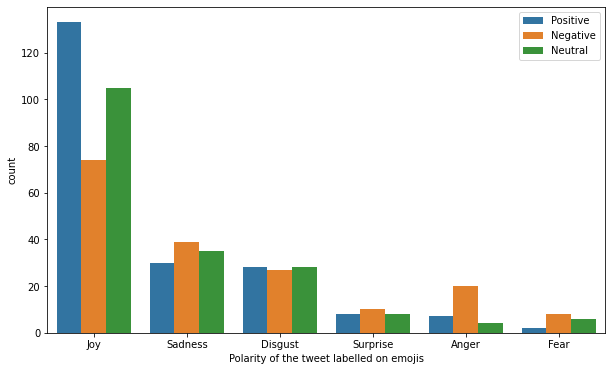

In [85]:
plt.figure(figsize=(10,6))
plt.xlabel("Polarity of the tweet labelled on emojis")
sns.countplot(hue=final['polarity'].values,x = final['emotion_from_emojis'].values)

**Polarity vs emotion in hashtags :**

<AxesSubplot:xlabel='Polarity of the tweet labelled on hashtags', ylabel='count'>

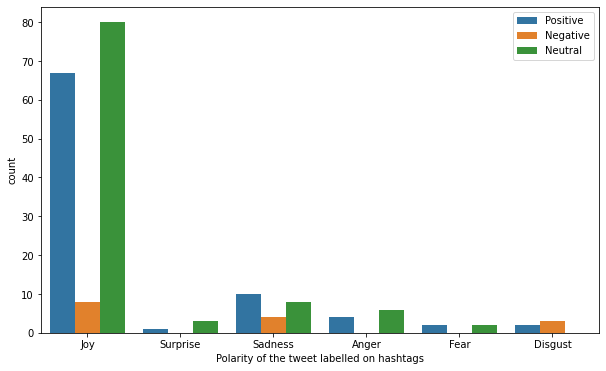

In [86]:
plt.figure(figsize=(10,6))
plt.xlabel("Polarity of the tweet labelled on hashtags")
sns.countplot(hue=final['polarity'].values,x = final['emotion_from_hashtags'].values)

# Using lexicons to label the emotion of a tweet

&nbsp;\
&nbsp;


> **"In this second experiment we have tried to label the dataset, using the emotion vectors for each word. And these vectors are extracted from a lexicon database."**

&nbsp;\
&nbsp;

**The below lexicon database is downloaded from the NRC (National Research Council Canada) and
the lexicons used in this project are created by the National Research Council Canada.\
\
http://sentiment.nrc.ca/lexicons-for-research/NRC-Emotion-Lexicon.zip\
\
\
Copyright: (C) 2016 National Research Council Canada (NRC)\
Contact: Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca),\
Senior Research Officer, National Research Council Canada**

## Downloading the lexicons data

In [87]:
!wget http://sentiment.nrc.ca/lexicons-for-research/NRC-Emotion-Lexicon.zip

--2020-10-03 17:31:10--  http://sentiment.nrc.ca/lexicons-for-research/NRC-Emotion-Lexicon.zip
Resolving sentiment.nrc.ca (sentiment.nrc.ca)... 132.246.39.111
Connecting to sentiment.nrc.ca (sentiment.nrc.ca)|132.246.39.111|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23860740 (23M) [application/zip]
Saving to: ‘NRC-Emotion-Lexicon.zip’

NRC-Emotion-Lexicon 100%[===================>]  22.75M   139KB/s    in 3m 5s   

2020-10-03 17:34:17 (126 KB/s) - ‘NRC-Emotion-Lexicon.zip’ saved [23860740/23860740]



In [88]:
!unzip NRC-Emotion-Lexicon.zip

Archive:  NRC-Emotion-Lexicon.zip
  inflating: NRC - Sentiment Lexicon - Research EULA Sept 2017 .pdf  
   creating: NRC-Emotion-Lexicon-v0.92/
  inflating: NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Senselevel-v0.92.txt  
  inflating: NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx  
  inflating: NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt  
   creating: NRC-Emotion-Lexicon-v0.92/Older Versions/
  inflating: NRC-Emotion-Lexicon-v0.92/Older Versions/NRC-Emotion-Lexicon-v0.92-InManyLanguages.xlsx  
  inflating: NRC-Emotion-Lexicon-v0.92/Older Versions/readme.txt  
  inflating: NRC-Emotion-Lexicon-v0.92/Paper1_NRC_Emotion_Lexicon.pdf  
  inflating: NRC-Emotion-Lexicon-v0.92/Paper2_NRC_Emotion_Lexicon.pdf  
  inflating: NRC-Emotion-Lexicon-v0.92/readme.txt  


## Importing the lexicons

In [89]:
lexicons = pd.read_excel('NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx',
                        usecols=['English (en)','Anger','Joy','Disgust','Sadness','Surprise','Fear'])

In [90]:
lexicons.head()

,English (en),Anger,Disgust,Fear,Joy,Sadness,Surprise
0,aback,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0
2,abandon,0,0,1,0,1,0
3,abandoned,1,0,1,0,1,0
4,abandonment,1,0,1,0,1,1


## Labeling emotion from tweet based on keywords

**Getting the cleaned tweets into a variable :**

In [91]:
tweets_text = final['text']
tweets_text

0        live recoveries exceed new cases 4 days says c...
1        really think idea still say 92% population sus...
2        flu avg corona /rhino repro rate 2 less covid ...
3        corona schism uk scientists split government d...
4        update corona schism uk scientists split gover...
                               ...                        
14184                         covid corona virus 19 strain
14185    wales coronavirus (covid-19) overview individu...
14186    forgotten covid-19 &amp protocols influx forei...
14187    trying push pov best stay clear bbc support in...
14188    scientists identify 21 existing drugs effectiv...
Name: text, Length: 14189, dtype: object

**Initializing words and lists :**

In [92]:
lexicon_words = lexicons['English (en)'].values
lexicon_words

array(['aback', 'abacus', 'abandon', ..., 'zoological', 'zoology', 'zoom'],
      dtype=object)

In [93]:
lexicons[lexicons['English (en)']=='abandon'].values[0][1:]

array([0, 0, 1, 0, 1, 0], dtype=object)

**Generating the scores for tweet :**

![vectors.png](assets/vectors.png)

In [94]:
tweets_emotion_scores = []

In [95]:
def generate_emotion_scores():
    """
    Generates the emotions scores for tweets
    """
    for tweet in tqdm(tweets_text):
        words_list = tweet.split()
        tweet_len = len(words_list)
        #print(tweet_len)
        tweet_scores = np.array([0,0,0,0,0,0])
        for word in words_list:
            if word in lexicon_words:
                tweet_scores = tweet_scores + lexicons[lexicons['English (en)']== word].values[0][1:]
        if sum(tweet_scores)!=0:
            tweet_scores = tweet_scores / sum(tweet_scores)
            tweets_emotion_scores.append(tweet_scores)
        else:
            tweets_emotion_scores.append(np.array([0,0,0,0,0,0]))  
        #print(tweets_emotion_scores)

In [96]:
generate_emotion_scores()

100%|██████████| 14189/14189 [05:54<00:00, 40.05it/s]


In [97]:
scores = pd.DataFrame(tweets_emotion_scores,
        columns=['Anger','Disgust','Fear','Joy','Sadness','Surprise'])

In [98]:
scores.head()

,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,0.000000,0.0,0.333333,0.333333,0.333333,0.0
1,0.333333,0.0,0.333333,0.000000,0.333333,0.0
2,0.000000,0.0,0.500000,0.000000,0.500000,0.0
3,0.200000,0.0,0.200000,0.200000,0.000000,0.4
4,0.200000,0.0,0.200000,0.200000,0.000000,0.4


## Analyzing the emotion scores

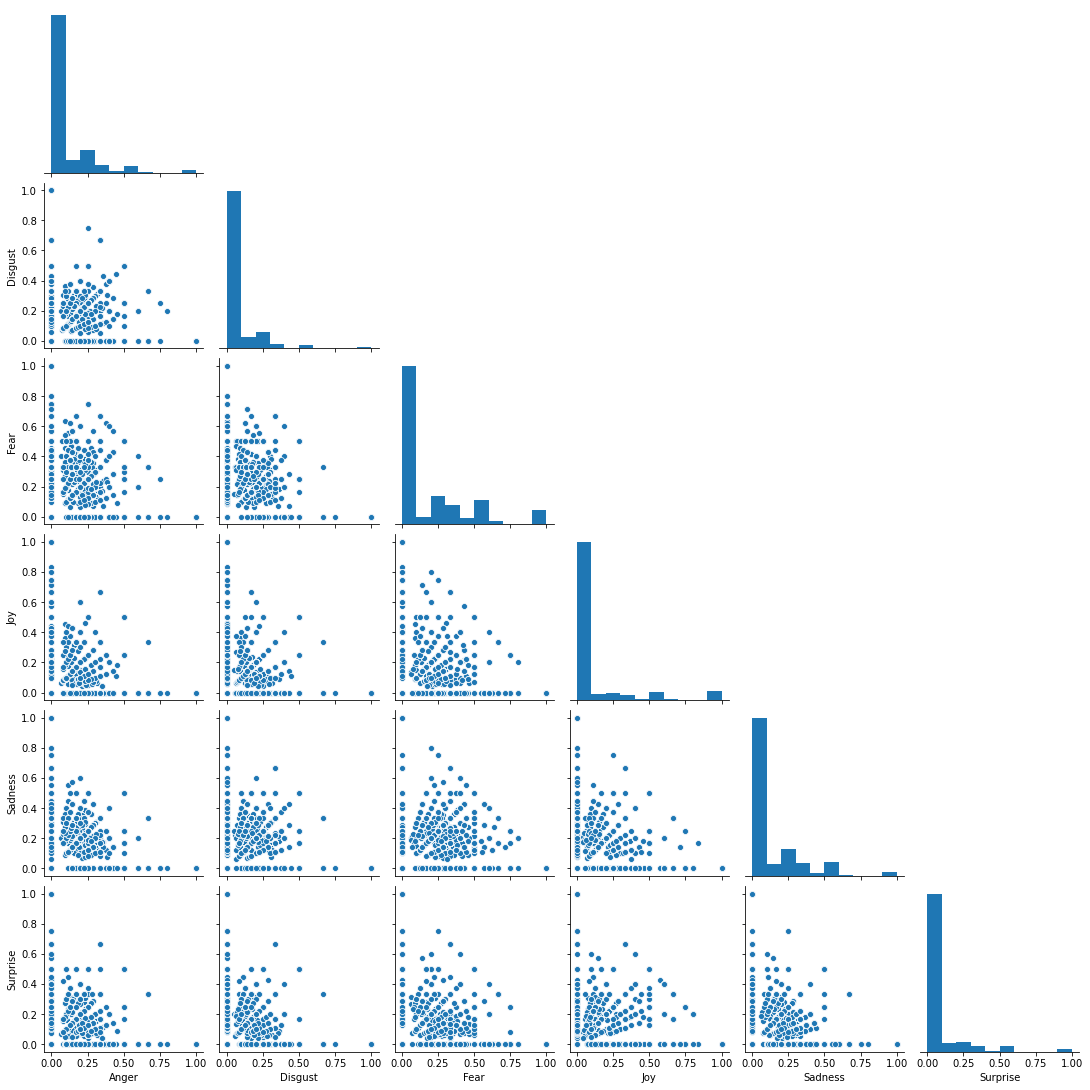

In [99]:
sns.pairplot(scores,corner=True)

## Merging scores and original dataframe

In [100]:
labeled_data = pd.merge(final, scores, how ='inner', on =scores.index).drop(['key_0'],axis=1)

In [101]:
labeled_data.head(2)

,text,location,date,time,time_of_the_day,emojis,emojis_in_words,hashtags,polarity,emotion_from_hashtags,emotion_from_emojis,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,live recoveries exceed new cases 4 days says c...,IN,Sep 22,11:30:00,Afternoon,*,*,"['CoronaVirusUpdates', 'coronaviruspandemic']",Positive,NaN,NaN,0.000000,0.0,0.333333,0.333333,0.333333,0.0
1,really think idea still say 92% population sus...,India,Sep 22,11:29:59,Afternoon,*,*,*,Positive,NaN,NaN,0.333333,0.0,0.333333,0.000000,0.333333,0.0


## Saving the labeled dataset

In [102]:
if not os.path.isfile('data/labeled_data.csv'):
    labeled_data.to_csv("data/labeled_data.csv",index=False)
else:
    print("labeled_data.csv already exists")

**Loading the labeled dataset :**

In [103]:
labeled_data = pd.read_csv("data/labeled_data.csv")

# Modeling

## Preparing the data for modeling

In [104]:
data_lb = labeled_data.drop(['date','location','time','emojis','emojis_in_words','hashtags','emotion_from_hashtags','emotion_from_emojis'],axis=1)

In [105]:
data_lb.head()

,text,time_of_the_day,polarity,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,live recoveries exceed new cases 4 days says c...,Afternoon,Positive,0.000000,0.0,0.333333,0.333333,0.333333,0.0
1,really think idea still say 92% population sus...,Afternoon,Positive,0.333333,0.0,0.333333,0.000000,0.333333,0.0
2,flu avg corona /rhino repro rate 2 less covid ...,Afternoon,Negative,0.000000,0.0,0.500000,0.000000,0.500000,0.0
3,corona schism uk scientists split government d...,Afternoon,Neutral,0.200000,0.0,0.200000,0.200000,0.000000,0.4
4,update corona schism uk scientists split gover...,Afternoon,Neutral,0.200000,0.0,0.200000,0.200000,0.000000,0.4


## Binarizing the emotion columns

In [106]:
data_lb['Anger'] = binarize(data_lb['Anger'].values.reshape(-1,1))
data_lb['Disgust'] = binarize(data_lb['Disgust'].values.reshape(-1,1))
data_lb['Fear'] = binarize(data_lb['Fear'].values.reshape(-1,1))
data_lb['Joy'] = binarize(data_lb['Joy'].values.reshape(-1,1))
data_lb['Sadness'] = binarize(data_lb['Sadness'].values.reshape(-1,1))
data_lb['Surprise'] = binarize(data_lb['Surprise'].values.reshape(-1,1))

In [107]:
data_lb.head()

,text,time_of_the_day,polarity,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,live recoveries exceed new cases 4 days says c...,Afternoon,Positive,0.0,0.0,1.0,1.0,1.0,0.0
1,really think idea still say 92% population sus...,Afternoon,Positive,1.0,0.0,1.0,0.0,1.0,0.0
2,flu avg corona /rhino repro rate 2 less covid ...,Afternoon,Negative,0.0,0.0,1.0,0.0,1.0,0.0
3,corona schism uk scientists split government d...,Afternoon,Neutral,1.0,0.0,1.0,1.0,0.0,1.0
4,update corona schism uk scientists split gover...,Afternoon,Neutral,1.0,0.0,1.0,1.0,0.0,1.0


## Checking for Imbalance

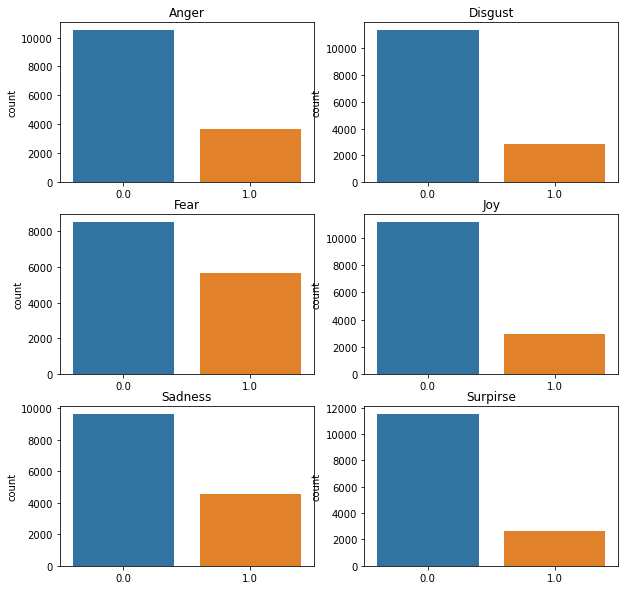

In [108]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(10,10))


ax[0, 0].set_title('Anger')
ax[0, 1].set_title('Disgust')
ax[1, 0].set_title('Fear')
ax[1, 1].set_title('Joy')
ax[2, 0].set_title('Sadness')
ax[2, 1].set_title('Surpirse')


sns.countplot(data_lb['Anger'].values,ax=ax[0,0])
sns.countplot(data_lb['Disgust'].values,ax=ax[0,1])
sns.countplot(data_lb['Fear'].values,ax=ax[1,0])
sns.countplot(data_lb['Joy'].values,ax=ax[1,1])
sns.countplot(data_lb['Sadness'].values,ax=ax[2,0])
sns.countplot(data_lb['Surprise'].values,ax=ax[2,1])

plt.show()

## Splitting the data into train and test

In [109]:
x = data_lb.iloc[:,:3]
y = data_lb.iloc[:,3:]

In [110]:
x.head(2)

,text,time_of_the_day,polarity
0,live recoveries exceed new cases 4 days says c...,Afternoon,Positive
1,really think idea still say 92% population sus...,Afternoon,Positive


In [111]:
y.head(2)

,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,0.0,0.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [113]:
print("Train set size : ",len(x_train))
print("Test set size : ",len(x_test))

Train set size :  9932
Test set size :  4257


## Vectorizing the tweet (TF-IDF)

In [114]:
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(x_train['text'].values)
x_train_text_tfidf = vectorizer_tfidf.transform(x_train['text'].values)
x_test_text_tfidf = vectorizer_tfidf.transform(x_test['text'].values)

In [115]:
print("Shape of text features")
print("x_train : ",x_train_text_tfidf.shape)
print("x_test  : ",x_test_text_tfidf.shape)

Shape of text features
x_train :  (9932, 22268)
x_test  :  (4257, 22268)


## Encoding the time of the day

In [116]:
vectorizer_bow_tod = CountVectorizer()
vectorizer_bow_tod.fit(x_train['time_of_the_day'].values)
x_train_time_bow = vectorizer_bow_tod.transform(x_train['time_of_the_day'].values)
x_test_time_bow = vectorizer_bow_tod.transform(x_test['time_of_the_day'].values)

In [117]:
print("Shape of time_of the day features")
print("x_train : ",x_train_time_bow.shape)
print("x_test  : ",x_test_time_bow.shape)

Shape of time_of the day features
x_train :  (9932, 5)
x_test  :  (4257, 5)


## Encoding the polarity

In [118]:
vectorizer_bow_pol = CountVectorizer()
vectorizer_bow_pol.fit(x_train['polarity'].values)
x_train_polarity_bow = vectorizer_bow_pol.transform(x_train['polarity'].values)
x_test_polarity_bow = vectorizer_bow_pol.transform(x_test['polarity'].values)

In [119]:
print("Shape of polarity features")
print("x_train : ",x_train_polarity_bow.shape)
print("x_test  : ",x_test_polarity_bow.shape)

Shape of polarity features
x_train :  (9932, 3)
x_test  :  (4257, 3)


## Building the feature sets

In [121]:
x_train_set = hstack((x_train_text_tfidf,x_train_time_bow,x_train_polarity_bow)).tocsr()
x_test_set = hstack((x_test_text_tfidf,x_test_time_bow,x_test_polarity_bow)).tocsr()

In [123]:
print("Final feature set size :")
print("x_train : ",x_train_set.shape)
print("x_test  : ",x_test_set.shape)

Final feature set size :
x_train :  (9932, 22276)
x_test  :  (4257, 22276)


## Getting class imbalances ratios

> **"If there is an imbalance in the class labels, then there is a high chance that the predictions could be biased. So we are getting class imbalance for each class and using it in class_weight parameter while modeling."**

In [124]:
total_points = len(y_train)

In [125]:
class_label = y_train['Anger'].value_counts()
print("For Anger class")
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")

For Anger class
Points with class label -> 0 are =   74.43616592831252 %
Points with class label -> 1 are =   25.563834071687474 %


In [126]:
class_label = y_train['Disgust'].value_counts()
print("For Disgust class")
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")

For Disgust class
Points with class label -> 0 are =   80.31614981876763 %
Points with class label -> 1 are =   19.68385018123238 %


In [127]:
class_label = y_train['Fear'].value_counts()
print("For Fear class")
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")

For Fear class
Points with class label -> 0 are =   60.330245670559805 %
Points with class label -> 1 are =   39.669754329440195 %


In [128]:
class_label = y_train['Joy'].value_counts()
print("For Joy class")
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")

For Joy class
Points with class label -> 0 are =   78.97704389850986 %
Points with class label -> 1 are =   21.022956101490134 %


In [129]:
class_label = y_train['Sadness'].value_counts()
print("For Sadness class")
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")

For Sadness class
Points with class label -> 0 are =   68.43536045106727 %
Points with class label -> 1 are =   31.564639548932742 %


In [130]:
class_label = y_train['Surprise'].value_counts()
print("For Surprise class")
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")

For Surprise class
Points with class label -> 0 are =   81.44381796214257 %
Points with class label -> 1 are =   18.55618203785743 %


## Logistic regression

**Defining a block for modeling logistic regression :**

In [131]:
class logistic_regression:
    def __init__(self,x_train,y_train,x_test,y_test,emotion,params,class_weight):
        """
        Initializing the variables
        """
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.emotion=emotion
        self.params=params
        self.class_weight=class_weight
    
    def model(self):
        """
        Builds a logistic regression model and displays results
        """
        self.es = LogisticRegression(class_weight = self.class_weight)
        self.best_model = GridSearchCV(self.es,param_grid=self.params)
        self.best_model.fit(self.x_train,self.y_train)
        print("#################    {0} Class     ############################".format(self.emotion))
        print('\n')
        print("Hyper parameter tuning result :",self.best_model.best_params_)
        self.es = LogisticRegression(class_weight = self.class_weight, C=self.best_model.best_params_['C'])
        self.es.fit(self.x_train,self.y_train)
        print("\n")
        print("Train Accuracy = ",self.es.score(self.x_train,self.y_train))
        print("Test Accuracy  = ",self.es.score(self.x_test,self.y_test))
        print("\n")
        self.fpr, self.tpr, self.thresholds = roc_curve(self.y_train, self.es.predict_proba(self.x_train)[:,1])
        self.fpr1, self.tpr1, self.thresholds1 = roc_curve(self.y_test, self.es.predict_proba(self.x_test)[:,1])
        plt.plot(self.fpr,self.tpr,label="Train AUC = "+str(roc_auc_score(self.y_train,self.es.predict_proba(self.x_train)[:,1])))
        plt.plot(self.fpr1,self.tpr1,label="Test AUC = "+str(roc_auc_score(self.y_test,self.es.predict_proba(self.x_test)[:,1])))
        plt.legend()
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.title(self.emotion+" class ROC curves")
        plt.show()
        cm = confusion_matrix(self.y_test,self.es.predict(self.x_test))
        sns.heatmap(cm, annot=True,fmt='d',
        cbar=False,xticklabels=['No','Yes'],
        yticklabels=['No','Yes']).set_title(self.emotion+" class Test Confusion Matrix")    

**Anger class :**

#################    Anger Class     ############################


Hyper parameter tuning result : {'C': 100}


Train Accuracy =  1.0
Test Accuracy  =  0.9180173831336622




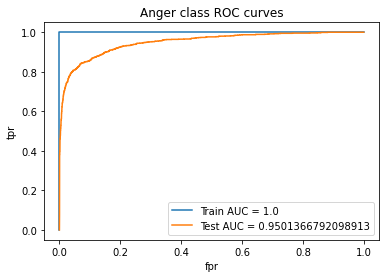

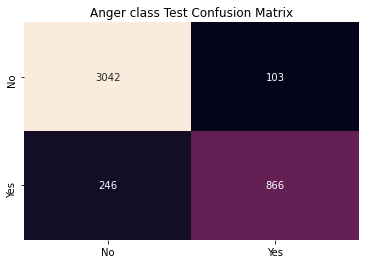

In [132]:
_anger = logistic_regression(x_train_set,y_train['Anger'],x_test_set,y_test['Anger'],"Anger",
                    {'C':[0.0001,0.001,0.01,0.1,10,100,1000]},class_weight={0:74,1:26})
_anger.model()

**Disgust class :**

#################    Disgust Class     ############################


Hyper parameter tuning result : {'C': 100}


Train Accuracy =  1.0
Test Accuracy  =  0.9311721869861405




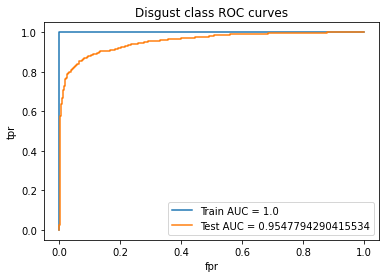

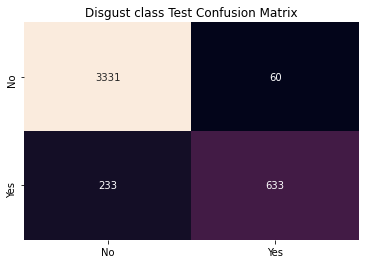

In [133]:
_disgust = logistic_regression(x_train_set,y_train['Disgust'],x_test_set,y_test['Disgust'],"Disgust",
      {'C':[0.0001,0.001,0.01,0.1,10,100,1000]},class_weight={0:80,1:20})
_disgust.model()

**Fear class :**

#################    Fear Class     ############################


Hyper parameter tuning result : {'C': 10}


Train Accuracy =  0.999798630688683
Test Accuracy  =  0.9062720225510923




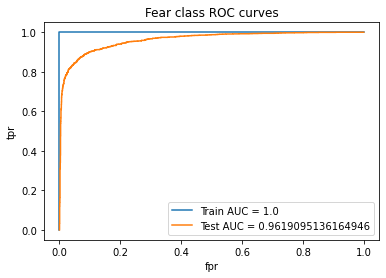

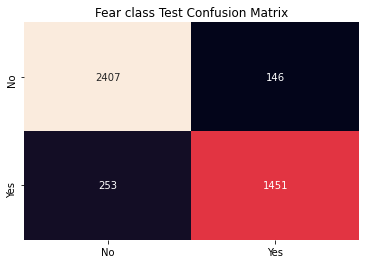

In [134]:
_fear = logistic_regression(x_train_set,y_train['Fear'],x_test_set,y_test['Fear'],"Fear",
      {'C':[0.0001,0.001,0.01,0.1,10,100,1000]},class_weight={0:60,1:40})
_fear.model()

**Joy class :**

#################    Joy Class     ############################


Hyper parameter tuning result : {'C': 1000}


Train Accuracy =  1.0
Test Accuracy  =  0.9299976509278834




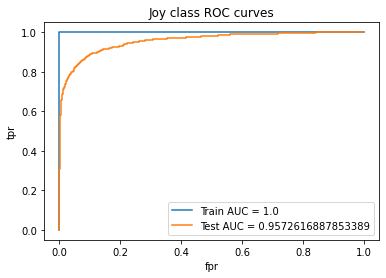

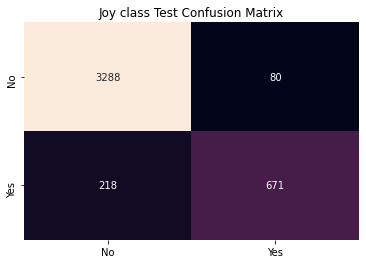

In [135]:
_joy = logistic_regression(x_train_set,y_train['Joy'],x_test_set,y_test['Joy'],"Joy",
      {'C':[0.0001,0.001,0.01,0.1,10,100,1000]},class_weight={0:78,1:22})
_joy.model()

**Sadness class :**

#################    Sadness Class     ############################


Hyper parameter tuning result : {'C': 1000}


Train Accuracy =  1.0
Test Accuracy  =  0.9175475687103594




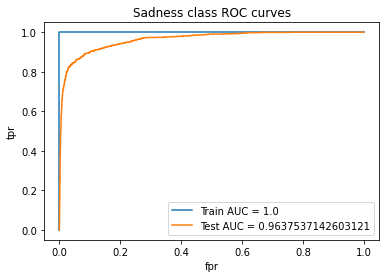

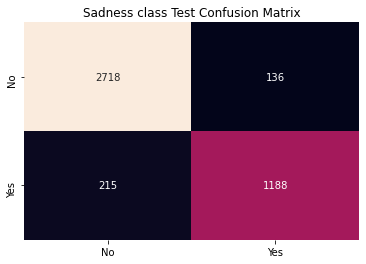

In [136]:
_sadness = logistic_regression(x_train_set,y_train['Sadness'],x_test_set,y_test['Sadness'],"Sadness",
      {'C':[0.0001,0.001,0.01,0.1,10,100,1000]},class_weight={0:68,1:32})
_sadness.model()

**Surprise class :**

#################    Surprise Class     ############################


Hyper parameter tuning result : {'C': 1000}


Train Accuracy =  1.0
Test Accuracy  =  0.945031712473573




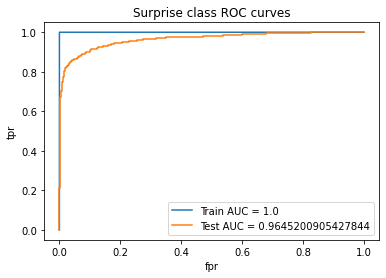

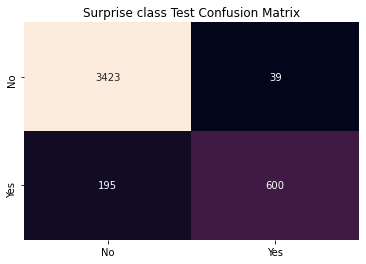

In [137]:
_surprise = logistic_regression(x_train_set,y_train['Surprise'],x_test_set,y_test['Surprise'],"Surprise",
      {'C':[0.0001,0.001,0.01,0.1,10,100,1000]},class_weight={0:82,1:18})
_surprise.model()

# Final steps

**Dumping the variables into a db for production use :**

In [138]:
path = os.getcwd()
try:  
    # Creating a new directory 'dump'
    os.mkdir(path+'/dump')  
except OSError as error:  
    # If directory already exists
    print(error)
    print("\nDelete the existing dump folder & try again")

In [139]:
f = open("dump/tf_idf.pkl", "wb")
dill.dump(vectorizer_tfidf,f)

In [140]:
f = open("dump/bow_tod.pkl", "wb")
dill.dump(vectorizer_bow_tod,f)

In [141]:
f = open("dump/bow_pol.pkl", "wb")
dill.dump(vectorizer_bow_pol,f)

**Dumping the 6 models using joblib :**

In [142]:
path = os.getcwd()
try:  
    # Creating a new directory 'models'
    os.mkdir(path+'/models')  
except OSError as error:  
    # If directory already exists
    print(error)
    print("\nDelete the existing models folder & try again")

In [143]:
joblib.dump(_anger.es,"models/_anger.sav")
joblib.dump(_disgust.es,"models/_disgust.sav")
joblib.dump(_fear.es,"models/_fear.sav")
joblib.dump(_joy.es,"models/_joy.sav")
joblib.dump(_sadness.es,"models/_sadness.sav")
joblib.dump(_surprise.es,"models/_surprise.sav")

['models/_surprise.sav']

&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;
**Referces and acknowledgements :**

1. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
3. https://www.geeksforgeeks.org/handling-oserror-exception-in-python/
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.DateOffset.html
5. https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
6. https://emojis.wiki/
7. https://stackoverflow.com/questions/43145199/create-wordcloud-from-dictionary-values
8. https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
9. http://sentiment.nrc.ca/lexicons-for-research/
10. https://seaborn.pydata.org/generated/seaborn.pairplot.html
11. https://stackoverflow.com/questions/9897345/pickle-alternatives

&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;\
&nbsp;

**The lexicon database is downloaded from the NRC (National Research Council Canada) and
the lexicons used in this project are created by the National Research Council Canada.\
\
http://sentiment.nrc.ca/lexicons-for-research/NRC-Emotion-Lexicon.zip\
\
\
Copyright: (C) 2016 National Research Council Canada (NRC)\
Contact: Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca),\
Senior Research Officer, National Research Council Canada**